# About Dataset
#### Content
India needs a boost to its economy that can also simultaneously transform local businesses. In order to support Indian brands, 'Vocal for Local' campaign was started in India. Emphasizing on a self-reliant, or ‘aatmanirbhar’, India, the Indian government has asked that products not just be made in India, but also for the promotion of local brands, manufacturing, and supply chain.

This dataset comprises of 2500+ reviews of about 100+ Indian Products pertaining to categories like hair and skin care products, clothes, electronic gadgets, etc from Amazon.

##### Column Description
asin : Amazon Standard Identification Number - a unique id for each product on Amazon

name : name of the product

date : date on which review was posted

rating : rating given to the product ( out of 5 )

review: review given to the product

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [4]:
data=pd.read_csv('C:/Users/MAVERICK/OneDrive/Desktop/Deep Learning/DATASET/Indian Amazon Product Review/amazon_vfl_reviews.csv')

In [5]:
data

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2777,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2778,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2779,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2780,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


In [6]:
for i in data.review:
    print('',i)

 I bought this hair oil after viewing so many good comments. But this product is not good enough.First of all it's Expensive...Second thing the amount of the product is low (half bottle) YES!The bottle is not completely filled with oil. If you cheating on your customers #Mamaearth trust me on this you can't fool people more than once. Now I know that your Brand is not good enough. I am not going to buy any product from your Brand again.Thumbs down for mamaearth onion oil !!
 Used This Mama Earth Newly Launched Onion Oil twice, and i must say im already impressed by the results !It prevents hair loss, helps control premature greying, dryness, dandruff, scalp eruptions and many other hair problems after its regular use !To avoid dry and frizzy hair, make sure that you use this oil to your hairs twice a week.Oiling provides your scalp with essential nutrients, and also strengthens the hair roots. Mamaearth onion oil works best for your hair during all the seasons.
 So bad product...My hai

 Be 100% sure, when you use a dettol products. Far better from others spray present in the market now.New improved container spray with a pleasent fragrance. Carry it inside your bag and stay safe.
 I used this product first time and I'm very much satisfied with this multi-purpose disinfectant spray that kills bacteria and viruses by eliminating odour causing bacteria . We can use this product in bedroom , toilet , kitchen , mattress etc . I recommend this product because it is very hygienic  and it also gives pleasant fragrance after every use.
 Dettol Surface Disinfectant Spray is good  for killing germs. But few points are worth noting.1. New spray bottle comes with a cap, whereas old bottle comes without cap, which is discontinued by dettol.2. Most of the material inside is gas, very less quantity of alcohol.3. New spray pump has very less spray power(too weak) when compared to old one.4. Dettol is widely used by people inspite of the fact that it comes with 60% alcohol, whereas ot

 Excellent product.
 Good tea
 Very fresh quality tee leaves
 Fastest delivery by amazon prime... And great taste of the tea...the fragrance of it is just amazing... recommended to one and all..
 Good Product I liked It
 Tasty
 Perfect, no hassles
 Strong.Takes less time to brew.Good in taste.
 The tea packet was torn . I would like this order replaced
 I always purchase Tata Agni Leaf tea. Could observe the quality and taste difference a lot this time. Quality not up to the mark. There is much difference between the previous and current tata agni tea purchase. Going forward not going to buy this tea. Waste of money. Not sure if other buyers observed the same.
 Tata Tea Agni is good but the quality of this tea have changed a lot previously there was some leaves but nowadays Tata Tea Agni contains only powder tea or dust tea, it gives good liquor but not so much flavour.If you want good liquor along with flavour then you must go for Tata Gold tea that is a good tea. I bought Tata Tea Ag

In [7]:
data.name.value_counts()

Tata-Tea-Gold-500g                               60
Society-Tea-Masala-Jar-250g                      40
Godrej-Security-Solutions-SEEC9060-Electronic    40
Himalaya-Baby-Shampoo-400-ml                     40
Himalaya-Moisturizing-Aloe-Vera-200ml            40
                                                 ..
Patanjali-UHT-Milk-1000-ml                       10
Indiana-Frutti-Cherries-Frooti-Multicolor         6
Amul-Cow-Ghee-500ml                               4
Tata-Tea-Premium-1-5kg                            2
Patanjali-Ayurved-Ltd-CORO-NIL-Tablet             2
Name: name, Length: 122, dtype: int64

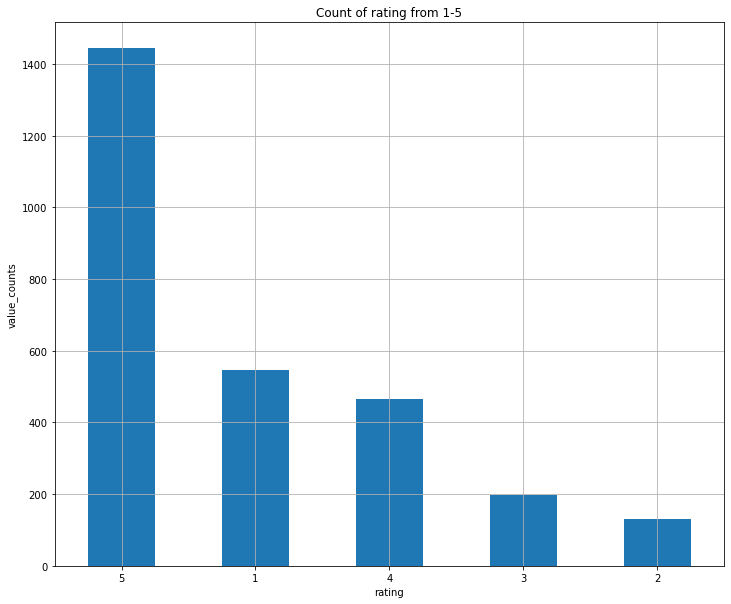

In [8]:
data.rating.value_counts().plot.bar(figsize=(12,10),title='Count of rating from 1-5')
plt.xlabel('rating')
plt.ylabel('value_counts')
plt.xticks(rotation=0)
plt.grid()

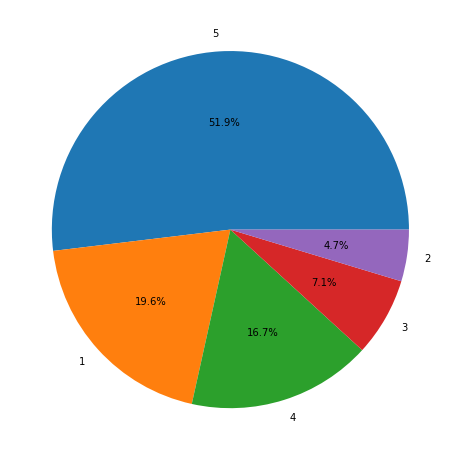

In [9]:
### checking value counts of 'Rating' in Percentage
plt.figure(figsize=(8,10))
df=data['rating'].value_counts()
keys=df.keys().to_list()
count=df.to_list()
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.show()

### Conclusion- 
From the above we can say that the maximum Rating has been given as 5 to the indian products i.e, approximatly 52% but still there are many customers who are not happy with the products and have given low rating

### Feature Engineering

In [10]:
# Separating the 'brands' from the 'product names'
data['brands']=data['name'].str.split('-').apply(lambda x: x[0])

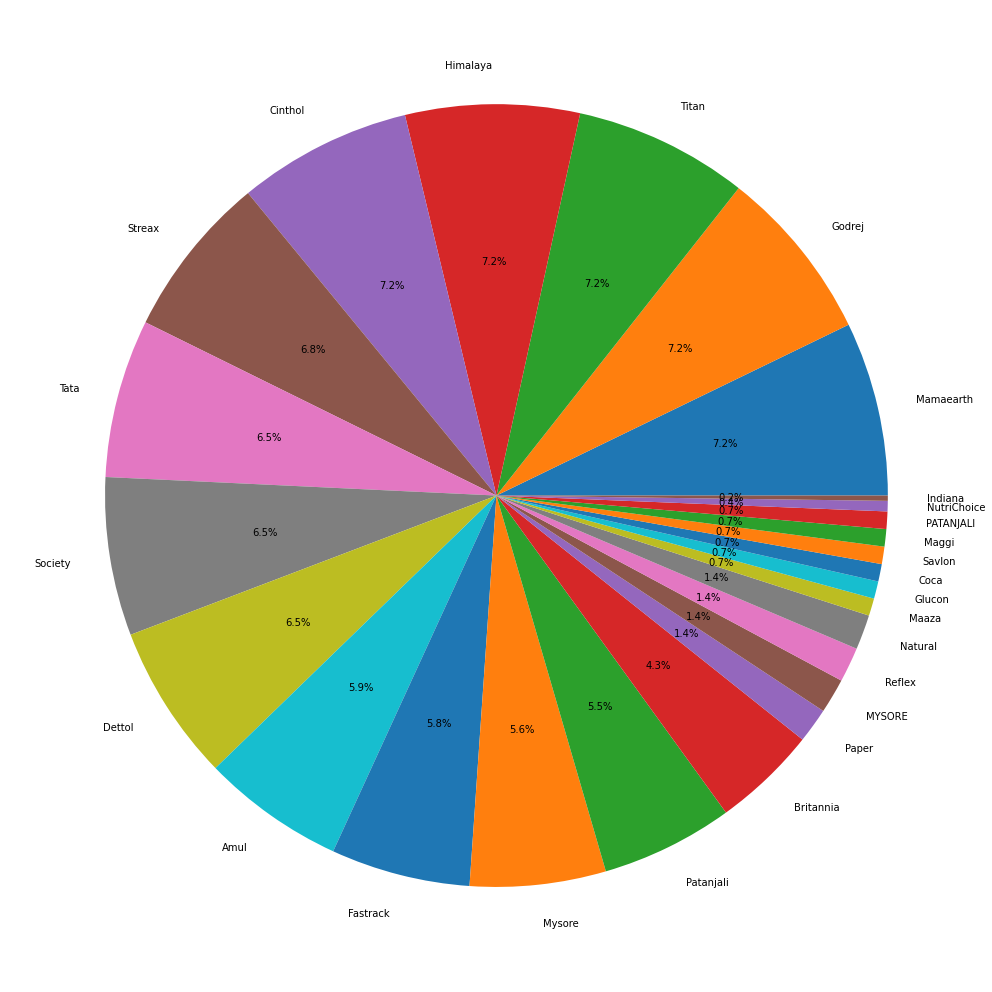

In [11]:
### checking value counts of 'brands' in Percentage
plt.figure(figsize=(18,18))
df=data['brands'].value_counts()
keys=df.keys().to_list()
count=df.to_list()
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.show()

In [12]:
data.columns

Index(['asin', 'name', 'date', 'rating', 'review', 'brands'], dtype='object')

In [13]:
# Dropping some of the columns since not required 
data.drop(['brands','asin', 'name', 'date'],axis=1,inplace=True)

In [14]:
data

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...
...,...,...
2777,5,Long lasting freshness throughout the day.
2778,5,My preferred soap
2779,2,ठीक नहीं लगा
2780,4,Super Product


In [15]:
# checking for null values
data.isnull().sum()

rating    0
review    4
dtype: int64

In [16]:
# getting the index with null values
data[data.review.isnull()].index

Int64Index([2248, 2258, 2631, 2641], dtype='int64')

In [17]:
# Reoving all the null values
data.dropna(axis=0,inplace=True)

In [18]:
data.isnull().sum()

rating    0
review    0
dtype: int64

In [19]:
# Reset the index 
data.reset_index(drop=True, inplace=True)
data

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...
...,...,...
2773,5,Long lasting freshness throughout the day.
2774,5,My preferred soap
2775,2,ठीक नहीं लगा
2776,4,Super Product


In [20]:
stopword = nltk.corpus.stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z0-9]',' ',data['review'][i]) # removing all the character other than alphabets
    review=review.lower()                  # Lowering all the cases 
    review=review.split()                  # spliting the sentence -> words for lemmatization
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))] # removing stopwords
    review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
    corpus.append(review)                  # Appending to corpus
print(corpus)

['bought hair oil viewing many good comment product good enough first expensive second thing amount product low half bottle yes bottle completely filled oil cheating customer mamaearth trust fool people know brand good enough going buy product brand thumb mamaearth onion oil', 'used mama earth newly launched onion oil twice must say im already impressed result prevents hair loss help control premature greying dryness dandruff scalp eruption many hair problem regular use avoid dry frizzy hair make sure use oil hair twice week oiling provides scalp essential nutrient also strengthens hair root mamaearth onion oil work best hair season', 'bad product hair falling increase much order shampoo mask oil nothing stop hairfallafter 3 4 wash hair falling badly', 'product smell similar navarathna hair oil strong oil sticky applying three drop oil review usage 2 months1 worst product2 hair fall increased lot3 brought product watching youtube influencer mumbaiker nikhil4 totally misguided never tak

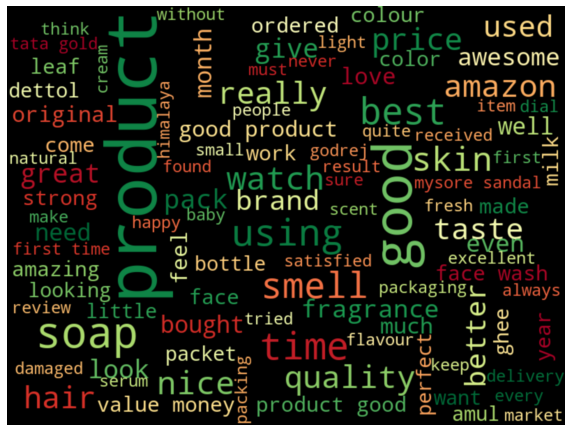

In [22]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 100,  
                       min_word_length = 4,
                       max_font_size = 100, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'quadric')
plt.axis('off')
plt.show()

# Model Modelling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## 1:Using Bag of Words

In [24]:
# Converting the Words to Vector using Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken 
X=cv.fit_transform(corpus).toarray()
y=data['rating']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

### Naive Bayes Model

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [27]:
nb.fit(x_train,y_train)

MultinomialNB()

In [28]:
train_pred=nb.predict(x_train)

In [29]:
test_pred=nb.predict(x_test)

In [30]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           1       0.93      0.89      0.91       453
           2       0.74      0.95      0.83        81
           3       0.71      0.82      0.76       136
           4       0.63      0.84      0.72       277
           5       0.94      0.85      0.89      1275

    accuracy                           0.86      2222
   macro avg       0.79      0.87      0.82      2222
weighted avg       0.88      0.86      0.86      2222

              precision    recall  f1-score   support

           1       0.83      0.81      0.82       113
           2       0.35      0.69      0.46        13
           3       0.50      0.62      0.56        32
           4       0.63      0.73      0.68        79
           5       0.89      0.81      0.85       319

    accuracy                           0.78       556
   macro avg       0.64      0.73      0.67       556
weighted avg       0.81      0.78      0.79       556



### Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier()

In [33]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
train_pred=rfc.predict(x_train)

In [35]:
test_pred=rfc.predict(x_test)

In [36]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test)) 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       437
           2       0.94      1.00      0.97        98
           3       0.96      1.00      0.98       152
           4       0.92      0.97      0.94       346
           5       0.99      0.97      0.98      1189

    accuracy                           0.98      2222
   macro avg       0.96      0.99      0.97      2222
weighted avg       0.98      0.98      0.98      2222

              precision    recall  f1-score   support

           1       0.97      0.92      0.95       115
           2       0.62      1.00      0.76        16
           3       0.90      1.00      0.95        36
           4       0.90      0.97      0.93        86
           5       0.99      0.94      0.96       303

    accuracy                           0.95       556
   macro avg       0.88      0.97      0.91       556
weighted avg       0.95      0.95      0.95       556



### Conclusion: Here we get a very good Model using 'Bag Of words' but Still the Semantic meaning will be missing So, to overcome this problem we are further going for TF-IDF Technique.


In [37]:
print('Test 3')
test3 = ["if you ate not giving onion oil in your ad, it only has onion extracts ."]
test_vec = cv.transform(test3)
print('The Rating is :',rfc.predict(test_vec))

Test 3
The Rating is : [5]


## 2:Using Term Frequency-Inverse Document Frequency 

In [38]:
# Converting the Words to Vector using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tf=TfidfVectorizer(ngram_range=(1,3),max_features=2500)
X=tf.fit_transform(corpus).toarray()

In [40]:
tf.vocabulary_

{'bought': 285,
 'hair': 948,
 'oil': 1453,
 'many': 1279,
 'good': 887,
 'comment': 444,
 'product': 1641,
 'enough': 677,
 'first': 790,
 'expensive': 714,
 'second': 1918,
 'thing': 2227,
 'amount': 117,
 'low': 1247,
 'half': 961,
 'bottle': 278,
 'yes': 2492,
 'completely': 455,
 'filled': 780,
 'cheating': 394,
 'customer': 496,
 'mamaearth': 1269,
 'trust': 2289,
 'people': 1543,
 'know': 1109,
 'brand': 293,
 'going': 879,
 'buy': 329,
 'thumb': 2238,
 'onion': 1480,
 'hair oil': 956,
 'product good': 1663,
 'good enough': 897,
 'cheating customer': 395,
 'brand good': 296,
 'going buy': 880,
 'buy product': 332,
 'onion oil': 1481,
 'used': 2339,
 'mama': 1266,
 'earth': 653,
 'newly': 1416,
 'launched': 1127,
 'twice': 2299,
 'must': 1379,
 'say': 1897,
 'im': 1039,
 'already': 92,
 'impressed': 1044,
 'result': 1846,
 'loss': 1230,
 'help': 989,
 'control': 470,
 'dandruff': 508,
 'scalp': 1898,
 'problem': 1639,
 'regular': 1817,
 'use': 2325,
 'avoid': 163,
 'dry': 635,
 '

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [42]:
nb.fit(x_train,y_train)

MultinomialNB()

In [43]:
train_pred=nb.predict(x_train)

In [44]:
test_pred=nb.predict(x_test)

In [45]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           1       0.84      0.91      0.87       399
           2       0.03      1.00      0.06         3
           3       0.19      1.00      0.32        30
           4       0.28      0.94      0.43       110
           5       1.00      0.69      0.81      1680

    accuracy                           0.74      2222
   macro avg       0.47      0.91      0.50      2222
weighted avg       0.92      0.74      0.80      2222

              precision    recall  f1-score   support

           1       0.72      0.91      0.81        87
           2       0.04      1.00      0.07         1
           3       0.10      1.00      0.18         4
           4       0.25      0.96      0.40        24
           5       1.00      0.66      0.79       440

    accuracy                           0.71       556
   macro avg       0.42      0.90      0.45       556
weighted avg       0.92      0.71      0.77       556



In [46]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
train_pred=rfc.predict(x_train)

In [48]:
test_pred=rfc.predict(x_test)

In [49]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       437
           2       0.94      1.00      0.97        98
           3       0.98      0.97      0.98       159
           4       0.90      0.99      0.94       335
           5       1.00      0.96      0.98      1193

    accuracy                           0.98      2222
   macro avg       0.96      0.99      0.97      2222
weighted avg       0.98      0.98      0.98      2222

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       117
           2       0.62      1.00      0.76        16
           3       0.93      0.95      0.94        39
           4       0.89      0.99      0.94        83
           5       0.98      0.94      0.96       301

    accuracy                           0.94       556
   macro avg       0.88      0.96      0.91       556
weighted avg       0.95      0.94      0.94       556



### Conclusion: So, by using the algorithm as Random Forest Classifier we are getting a very good model having a Good Precison,Recall and Accuracy So, we can Conclude that the 'Review' and the 'Rating' are very much Similar provided by the Customers

# Checking if the Model is Good or not.

In [50]:
print('Test 1')
test1 = ["shampoo mask and oil. nothing stop hairfallAfter 3 to 4 wash my hair falling so badly ."]
test_vec = tf.transform(test1)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 1
The Predicted Rating is : [1]


In [51]:
print('Test 2')
test2 = ["I used it only one time so I can't say about hairfall control . it made my hair extremely soft and shiny ."]
test_vec = tf.transform(test2)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 2
The Predicted Rating is : [5]


In [52]:
print('Test 3')
test3 = ["""Product just smells similar to navarathna hair oil .. 
         but not strong as that and oil is not sticky after applying three drops of oil !! 
         More review after usage of 2 months
         1) worst product
         2) hair fall increased a lot
         3) brought this 
         product after watching YouTube influencer Mumbaiker Nikhil
         4) totally misguided never take suggestions from influencers.
         5)using since 2 months no result and I'm losing my more hair
         6) mama earth just wasted my money as well damaged my hair
         7)better they provide solution or return my money"""]
test_vec = tf.transform(test3)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 3
The Predicted Rating is : [1]


In [53]:
print('Test 4')
test2 = ["""The first half of the innings was boring as their were no proper shot played by batsman. 
         It was a slow start however as we approached 40th over batsman shift gears and scored a lot of runs """]
test_vec = tf.transform(test2)
print('The Predicted Rating is :',rfc.predict(test_vec))

Test 4
The Predicted Rating is : [4]


## Hence,Predicted  Rating with respect to Reviews Given by the Customer  on the Products are Accurate.